# Calcul des diagrammes de plongement
Le but est de calculer le diagramme de plongement et de mettre en évidence une masse maximun. On se place dans le cas où l'étoile est homogène. Le système TOV s'intégre alors facilement et on a la forme de l'espace temps. 
Dans ce cas, la géométrie de l'espace temps ne dépend que de deux paramètres (R,M) ou (M, $\Xi$)

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

%matplotlib notebook

### Intégration du sytème TOV dans le cas d'une sphère homogène

$$ m(r)	=\begin{cases}
M(r/R)^{3} & pour\,\,r\leq R\\
M & pour\,\,r\geq R
\end{cases}\\
P(r)	=\begin{cases}
\rho_{c}\frac{\sqrt{1-2\Xi(r/R){{}^2}}-\sqrt{1-2\Xi}}{3\sqrt{1-2\Xi}-\sqrt{1-2\Xi(r/R){{}^2}}} & pour\,\,r\leq R\\
0 & pour\,\,r\geq R
\end{cases}\\
\Phi(r)	=\begin{cases}
c{{}^2}ln\left(\frac{3\sqrt{1-2\Xi}-\sqrt{1-2\Xi(r/R){{}^2}}}{2}\right) & pour\,\,r\leq R\\
\frac{c{{}^2}}{2}ln\left(1-2\Xi\frac{R}{r}\right) & pour\,\,r\geq R
\end{cases} $$ 


La métrique en coordonnée de Schwarschild s'exprime avec : 
$$ N(r)=e^{\frac{\Phi(r)}{c^{2}}}$$ et $$ A(r)=\frac{1}{\sqrt{1-\frac{2Gm(r)}{rc^{2}}}}$$

Pour le diagramme de longement, on trace la courbe : 
$$f(r)=\begin{cases}
2R_{S}\sqrt{\frac{r}{R_{s}}-1}+C & pour\,\,r\leq R\\
-\sqrt{r^{2}-\frac{3c^{2}}{8\pi G\rho}}+C & pour\,\,r\geq R
\end{cases}$$

In [35]:
c = 1
G = 1

def plongement(r, R, M):
    rho = M/(4/3 * np.pi * R**3)
    R_s = 2 * G * M/c**2
    a = 3*c**2/(8*np.pi*rho*G)
    if r>R:
        return 2 * R_s * np.sqrt(r/R_s-1) -2 * R_s * np.sqrt(R/R_s-1) - np.sqrt(-R**2+a)
    else :
        return -np.sqrt(-r**2+a)
def m(r, R, M):
    if r >=R : return M
    else : return M * (r/R)**3
    
def phi(r, R, M):
    xi = G*M/(R*c**2)
    if r >= R : return c**2 / 2 * np.log(1 - 2 * xi *R/r)
    else : return c**2 * np.log((3*np.sqrt(1 - 2*xi)-np.sqrt(1-2*xi * (r/R)**2))/2)

def P(r, R, M):
    xi = G*M/(R*c**2)
    if r <= R:
        rho = M/(4/3 * np.pi * R**3)
        return rho * c**2 * (np.sqrt(1-2*xi*(r/R)**2)-np.sqrt(1-2*xi))/(3*np.sqrt(1-2*xi) - np.sqrt(1-2*xi*(r/R)**2))
    else : return 0
    
def A(r, R, M):   
    if r >= R:
        R_c = 2 * G * M/c**2
        return -1/np.sqrt(1-R_c/r)
    elif r>0:
        m_r = m(r,R,M)
        #print(1-R_c/r, '   ', r)
        return -1/np.sqrt(1-2*G*m_r/(r * c**2))

### Courbe de plongement à une seule dimension
Comme la courbe ne dépend que de r, on peut la tracer uniquement en fonction de r pour se rendre compte de quelques phénomènes. On se rappelle que la valeur critique est $\Xi = \frac{4}{9}$

0.4888888888888889  xi


<IPython.core.display.Javascript object>


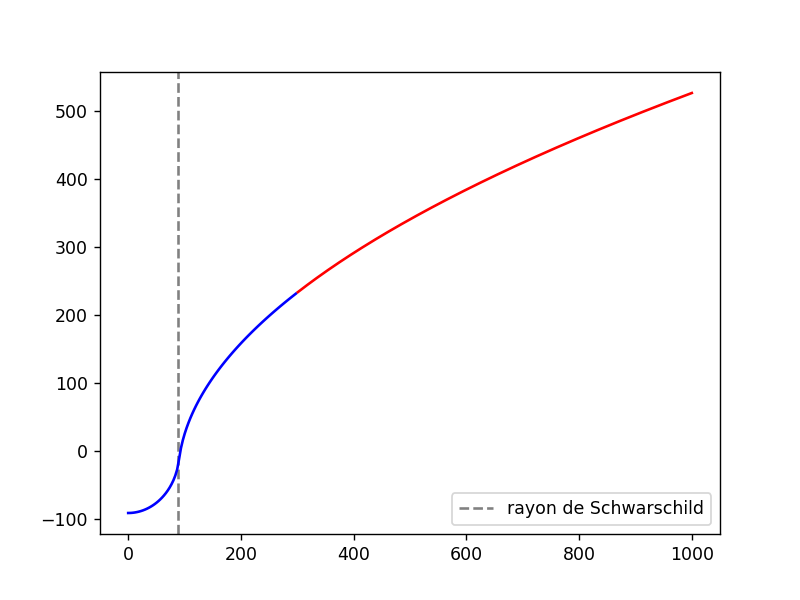

In [66]:
radii = np.linspace(0, 1000, 300)
R = 90
M = 44
R_s = 2 * G * M/c**2

print(G*M/(R*c**2), ' xi')
z = np.vectorize(plongement)(radii, R, M)
plt.figure()
plt.axvline(x=R_s,color='gray',linestyle='--', label = 'rayon de Schwarschild')
plt.plot(radii[0:R], z[0:R], 'b')
plt.plot(radii[R:], z[R:], 'r')
plt.legend()
plt.show()

### Graph dans le plan des courbes
On observe bien une compacité maximale au-delà de laquelle l'équilibre n'est plus possible pour $\Xi = \frac{4}{9}$

In [37]:

def graph(R, M):   
    n_radii = 100
    n_angles = 36

    xi = G*M/(R*c**2)
    print(xi, ' xi')
    # Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
    radii = np.linspace(0, 10.0, n_radii)
    angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

    # Repeat all angles for each radius.
    angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

    # Convert polar (radii, angles) coords to cartesian (x, y) coords.
    # (0, 0) is manually added at this stage,  so there will be no duplicate
    # points in the (x, y) plane.
    x = np.append(1, (radii*np.cos(angles)).flatten())
    y = np.append(1, (radii*np.sin(angles)).flatten())

    # Compute z to make the pringle surface.
    z = np.vectorize(plongement)(np.sqrt(x**2 + y**2), R, M)

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

    plt.show()

widgets.interact_manual(graph, R = widgets.fixed(3) , M = widgets.FloatLogSlider(base = 10, min=-4, max=0, step = 0.2,  description='xi'))   

interactive(children=(FloatLogSlider(value=1.0, description='xi', max=0.0, min=-4.0, step=0.2), Button(descrip…

<function __main__.graph(R, M)>